




# Power Production Project
***

#### Project Question
***

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

#### Project Analysis
***

As part of this project we were tasked with reviewing and analysing a dataset for speed and power, using this data set we then we asked to train a model to predict the power output after a user inputs a wind speed. The final task was to output this on a user interface using a python package Flask.

This Jupyter notebook will review all the above tasks. Initially we will review the data, train three models and review there benefits and finally pick the best fit to complete the Flask task.

We start analysing the data by import a number of packages.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We can then import the CSV file as a dataframe in pandas and output the top 20 rows to begin to gain a perspective on the data.

In [3]:
df = pd.read_csv (r'powerproduction.csv')
df.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


The next number of checks is to review data types and to see if there is any blanks

In [4]:
df.dtypes

speed    float64
power    float64
dtype: object

In [5]:
df.isnull().values.any()

False

The next method we can call on the dataframe is to "descirbe()" which gives more of an insight into the dataset.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,500.0,12.590398,7.224991,0.0,6.32475,12.5505,18.77525,25.000
power,500.0,48.014584,41.614572,0.0,5.28800,41.6455,93.53700,113.556


Individually, all the above steps help in understanding the data however after reviewing all steps together we can make a number of assumptions. The dataset contains two number columns "speed" and "power". Both columns are made up of datapoints of floating point numbers and we have no null values (blank cells). 500 samples with a mean wind speed value of 12.59 m/s and a mean power output 48.01 w. 

As we can see from the df.head(20) method above - there are a number of Zero power output from a non-zero wind speed. These error may be down to a number of factors, however must remove these outliers from our model as we require an ideal out.

We can now split the dataframe into Zero and non-Zero output.

In [7]:
#df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)
df_remove_power_Zero =  df[df.power != 0]
df_all_zero_power = df[df.power ==0]
df_remove_power_Zero.head(20)

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


We can now review the impact the outliers have on the dataframe. There were 49 Zero power out outliers. The Mean for both the speed and power has increase, which is to be expected, to 13m/s and 53.23w respectively.

In [8]:
df_remove_power_Zero.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,451.0,13.004302,6.835979,0.325,7.3445,13.038,18.7815,24.399
power,451.0,53.231246,40.522055,0.067,8.5435,58.168,94.7255,113.556


At this point plotting the data will give a further understanding of how the data is behaving. From the graph, below we can see, as the wind speed increases so dose the power output. The windspeed from 0-10 m/s has a relatively low power output. From a wind speed of 10-20 has a significant power output increase as the we increment up through the datapoints. From 20-25m/s windspeed we ave a similar plato in power output as in the earlier 0-10m/s

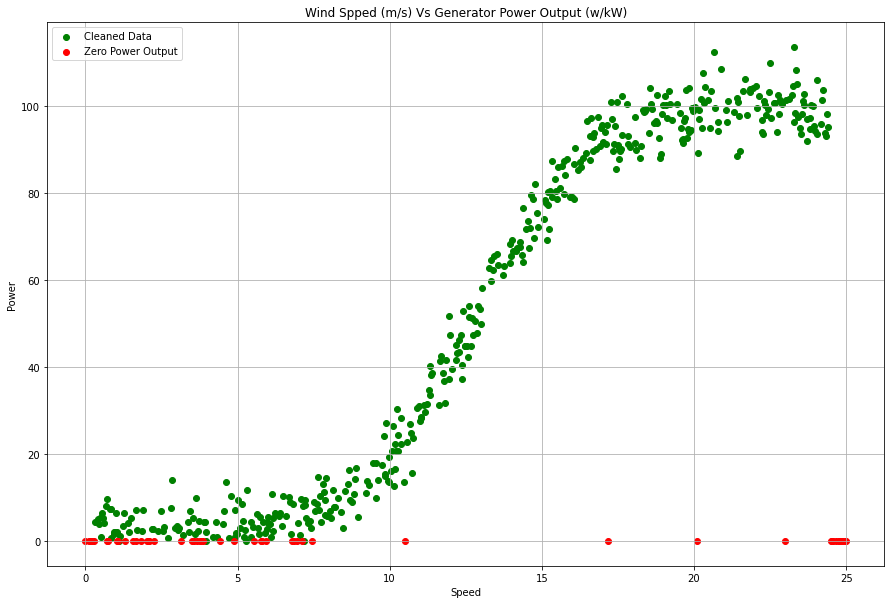

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(df_remove_power_Zero['speed'],df_remove_power_Zero['power'],color='green', label="Cleaned Data")
plt.scatter(df_all_zero_power['speed'],df_all_zero_power['power'],color='red', label="Zero Power Output")
plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Having reviewed the data we can now review the relationships it follows using the following machine learning models. 
1. Linear Regression
2. k Nearest Neighbour
3. Neural Network

We can now import all the relevant packages to produce these models.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
from tensorflow import keras

Using the above dataframe we can now slit the data into X and Y values - Speed and Power

In [11]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

We must reshape the data to preprocess it for the models.

In [12]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

We can now split the data into the train and validation for speed and power, X and Y. 80% of the data is used for training the models while the remaining 20% is used to validate or evaluate the model.

In [13]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.20, random_state=7)

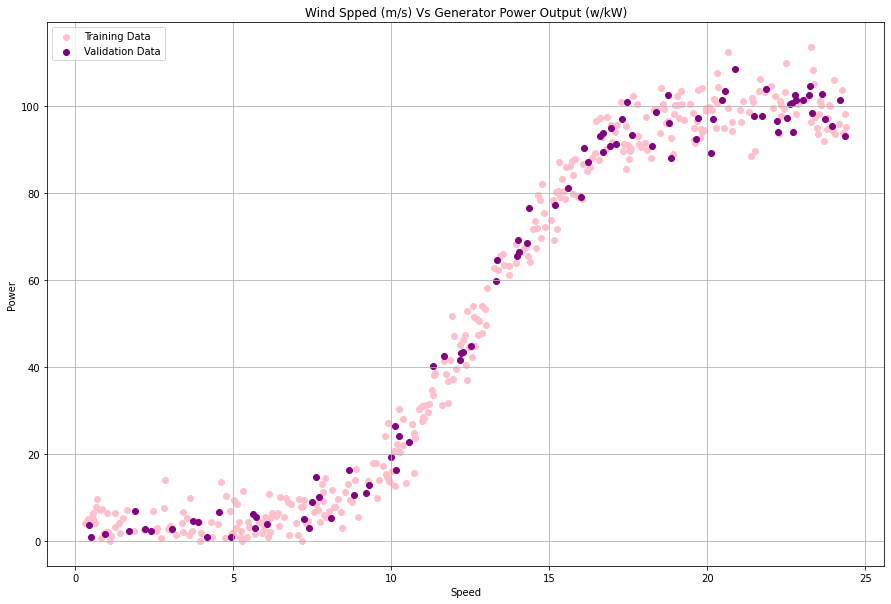

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(X_train,Y_train,color='pink', label="Training Data")
plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Linear Regression
***

Using the Linear regression model we are imply there is a linear relationship observed with the data - in a straight line. As the speed increases the Power output will also increase. If we look at the graph below we assume the datapoints are listed along the straight line.

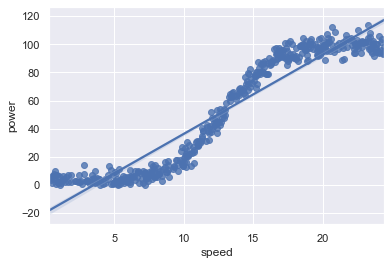

In [15]:
sns.set_theme(color_codes=True)
sns.regplot(x="speed", y="power", data=df_remove_power_Zero);

We can now train the model linear regression model with the training data.

In [16]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)

Using the model we can atempt to predict the power output at wind speed 15m/s.

In [19]:
lin_reg_model.predict(np.array([[15]]))[0]

64.56508418925088

We can now evaluate the model on a granular level - We know the input and the actual output, in the code below we can iterate through the 20% training dataset and view the percentage difference between predicted and actual values.

In [20]:
Y_pred = lin_reg_model.predict(X_validation)
for i in range(0,len(Y_pred)):
    a = X_validation[i]
    b = round(Y_pred[i],3)
    c = round(Y_validation[i],3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:39.465, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: 73.412%

Wind Speed: [22.723]
PREDICTED VALUE:108.234, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 15.187%

Wind Speed: [24.349]
PREDICTED VALUE:117.428, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 26.161%

Wind Speed: [22.523]
PREDICTED VALUE:107.103, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 10.125%

Wind Speed: [9.309]
PREDICTED VALUE:32.386, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 151.425%

Wind Speed: [20.17]
PREDICTED VALUE:93.798, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: -3.264%

Wind Speed: [5.681]
PREDICTED VALUE:11.872, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 291.041%

Wind Speed: [10.11]
PREDICTED VALUE:36.915, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: 39.687%

Wind Speed: [20.571]
PREDICTED VALUE:96.066, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -7.097%

Wind Speed: [14.364]
PREDICTED VALUE:60.969, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -20.355%

Wind Speed: [23.248]
PREDICT

If we review the above data comparison output, along with the graph above, we can see - as the actual data cross the regression line the values appear to have a reduced percentage difference. The datapoints at 7.5m/s and circa 17m/s have the greatest percentage difference. As the real data is furthest from these points. This percentage difference is how near the datapoints are to the above regression line. The linear regression has a built in method of score to view this difference also known as R^2. Below is an example of the r value of the model

In [21]:
r = lin_reg_model.score(X_validation, Y_validation)
print(r)

0.9038134283916828


The nearer the value is to one be better the fit of the model. We can now plot the 20% validation data versus the predicted data for review.

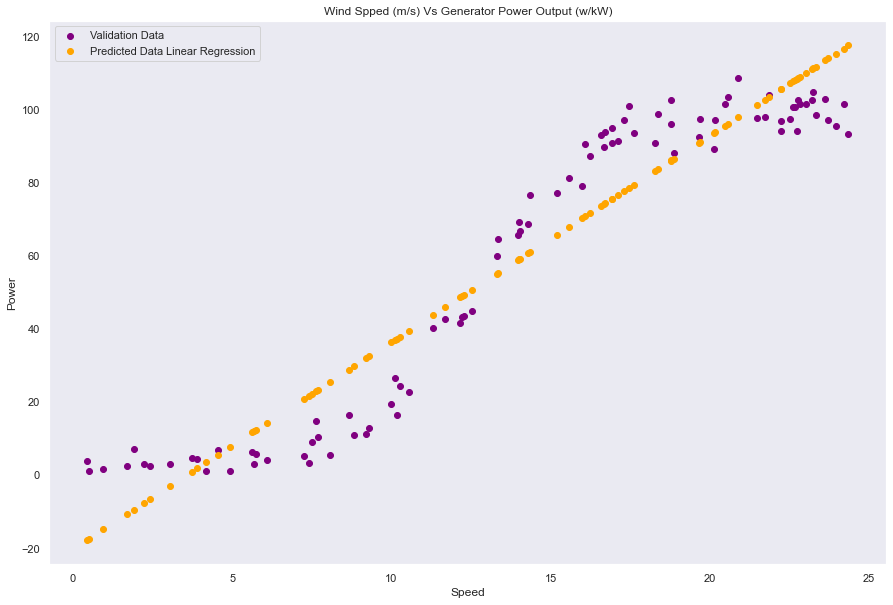

In [22]:
plt.figure(figsize=(15,10))


plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,Y_pred,color='orange', label="Predicted Data Linear Regression")

plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

k Nearest Neighbours
***

k Nearest Neighbour is based on the average of the k nearest neighbours. The model identifies the other data points near the defined input and returns an average of the desired output, in this case Power output. Below is an example of the kNN model. If we choose the green point in the centre this is our desired node and the k value is the predetermined average number of samples.

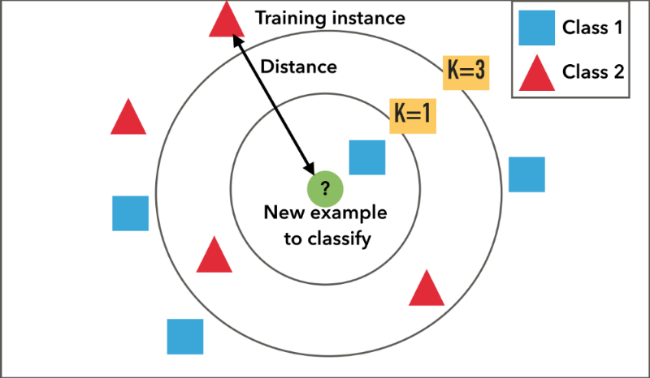

The above image was take from https://medium.com/@sonish.sivarajkumar/k-nearest-neighbours-knn-algorithm-9900c1427726

As before we train the model with the train data (80%) and a k value of 5, this is the average of the five nearest datapoints.

In [24]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)

As for the linear regression model we can now use the model to predict the value of power output for the wind speed of 15m/s

In [25]:
knn.predict(np.array([[15]]))[0]

75.5042

Using the same approach we can now review the predicted value for power output versus the actual from the dataset.

In [26]:
Y_knn_pred = knn.predict(X_validation)
for i in range(0,len(Y_knn_pred)):
    a = X_validation[i]
    b = round(Y_knn_pred[i].item(0),3)
    c = round(Y_validation[i].item(0),3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:20.649, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: -9.267%

Wind Speed: [22.723]
PREDICTED VALUE:102.242, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 8.81%

Wind Speed: [24.349]
PREDICTED VALUE:97.321, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 4.559%

Wind Speed: [22.523]
PREDICTED VALUE:102.121, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 5.002%

Wind Speed: [9.309]
PREDICTED VALUE:14.764, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 14.618%

Wind Speed: [20.17]
PREDICTED VALUE:100.566, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: 3.716%

Wind Speed: [5.681]
PREDICTED VALUE:3.097, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 2.009%

Wind Speed: [10.11]
PREDICTED VALUE:18.496, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: -30.011%

Wind Speed: [20.571]
PREDICTED VALUE:99.487, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -3.789%

Wind Speed: [14.364]
PREDICTED VALUE:67.28, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -12.111%

Wind Speed: [23.248]
PREDICTED VALUE:

In general we can see the model has a higher level of accuracy in predicting the power output. The predicted value and the actual value have a much smaller percentage difference between one another. THe below graph illustrates the actual data versus the predicted data for the kNN model. We can now use the model.score method to determine the "accuracy" or the distances the predicted points are away from the actual points.

In [27]:
k = knn.score(X_validation, Y_validation)
print(k)

0.9904822357829398


After reviewing the above graph we can see that the data plot of both data sets follow the same 

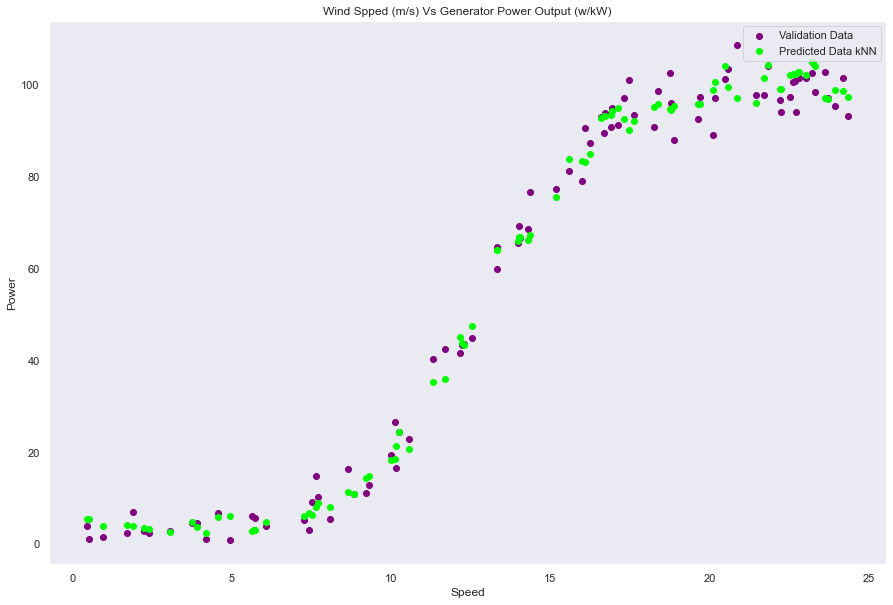

In [28]:
plt.figure(figsize=(15,10))


plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,Y_knn_pred,color='lime', label="Predicted Data kNN")

plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Neural Networks
***

A neural network is defined by IBM as - "Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning." The below image is a graphical representation of the building blocks of a neural network. The process works much like that of the human mind. There are x number of inputs and y number of outputs, depending on the complexity of the network.

Each model is made up of an input layer, one or multiple hidden layers and finally the output layer. The hidden layer is where the processes are performed on the data. There are a large number or factors that effect the hidden layer some of which include.
1. Neuron - the neuron is shown below as a blue ball, receives an input carries out a process and then returns an output.
2. Weights - as the input enters the neuron it is acted on by the weight, the weight determines the level of importance on an input. 
3. Bias - where the expected value differs underlying data the bias acts to correct that.
4. Activation Function - is the pattern the neural network should follow and if the input should be included based on a number of factors.

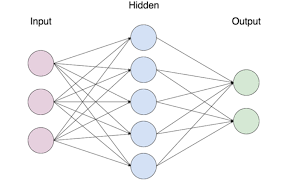

The above image was taken from the following link https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e

After the earlier analysis of the data there is a case for Sigmoid & tanh activation function. For this exercise I choose tanh shown on the graph below.

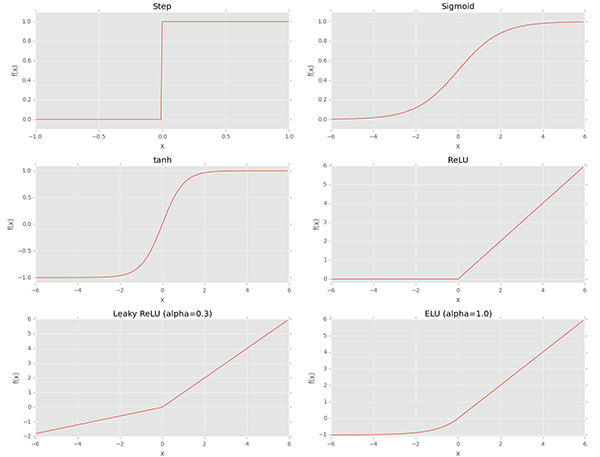

Source for the image: https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

We can now set up the neural network using the below piece of code. We chose to use a sequential model with on input and one output. The model contains four layers the input, tanh with 30 nodes, linear with one node and the output layer. The model is then compiled using 'adam' and a loss of mean squared error.

In [29]:
#https://keras.io/guides/sequential_model/
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_shape=(1,), activation="tanh"))
model.add(keras.layers.Dense(1, input_shape=(1,), activation="linear"))
#model.add(keras.layers.Dense(1, output_shape=(1,)))
model.compile('adam',loss='mean_squared_error')

Below is a summary of the model. The second layer of linear activation was to ensure one output for every one input.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


As with the previous models we can now train the model with model.fit of the training data. 

In [31]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 1ms/step - loss: 4252.2835
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 4360.7890
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 4585.6555
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 4185.3117
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 4326.4270
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 4224.2703
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 3942.6874
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 3955.7502
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 4131.6343
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 4245.3142
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 3966.0464
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 4068.6986
E

12/12 [==============================] - 0s 1ms/step - loss: 1745.1112
Epoch 99/500
12/12 [==============================] - 0s 1ms/step - loss: 1845.9928
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 1747.5789
Epoch 101/500
12/12 [==============================] - 0s 1ms/step - loss: 1803.5625
Epoch 102/500
12/12 [==============================] - 0s 1ms/step - loss: 1563.9160
Epoch 103/500
12/12 [==============================] - 0s 1ms/step - loss: 1754.2374
Epoch 104/500
12/12 [==============================] - 0s 1ms/step - loss: 1494.9792
Epoch 105/500
12/12 [==============================] - 0s 1ms/step - loss: 1658.5467
Epoch 106/500
12/12 [==============================] - 0s 1ms/step - loss: 1716.8057
Epoch 107/500
12/12 [==============================] - 0s 1ms/step - loss: 1593.5350
Epoch 108/500
12/12 [==============================] - 0s 1ms/step - loss: 1603.2914
Epoch 109/500
12/12 [==============================] - 0s 1ms/step - loss: 1634.

Epoch 195/500
12/12 [==============================] - 0s 2ms/step - loss: 679.7619
Epoch 196/500
12/12 [==============================] - 0s 1ms/step - loss: 654.8663
Epoch 197/500
12/12 [==============================] - 0s 1ms/step - loss: 651.9740
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 673.7391
Epoch 199/500
12/12 [==============================] - 0s 1ms/step - loss: 655.6549
Epoch 200/500
12/12 [==============================] - 0s 1ms/step - loss: 643.3719
Epoch 201/500
12/12 [==============================] - 0s 1ms/step - loss: 653.3510
Epoch 202/500
12/12 [==============================] - 0s 1ms/step - loss: 654.0934
Epoch 203/500
12/12 [==============================] - 0s 1ms/step - loss: 670.0805
Epoch 204/500
12/12 [==============================] - 0s 1ms/step - loss: 572.6063
Epoch 205/500
12/12 [==============================] - 0s 1ms/step - loss: 602.4655
Epoch 206/500
12/12 [==============================] - 0s 1ms/step - loss: 5

12/12 [==============================] - 0s 1ms/step - loss: 210.1079
Epoch 293/500
12/12 [==============================] - 0s 2ms/step - loss: 179.0126
Epoch 294/500
12/12 [==============================] - 0s 2ms/step - loss: 203.0229
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 212.2204
Epoch 296/500
12/12 [==============================] - 0s 1ms/step - loss: 164.5277
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 197.2172
Epoch 298/500
12/12 [==============================] - 0s 1ms/step - loss: 167.2679
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 168.2333
Epoch 300/500
12/12 [==============================] - 0s 1ms/step - loss: 175.7473
Epoch 301/500
12/12 [==============================] - 0s 1ms/step - loss: 174.2363
Epoch 302/500
12/12 [==============================] - 0s 1ms/step - loss: 165.0420
Epoch 303/500
12/12 [==============================] - 0s 1ms/step - loss: 164.7883
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 45.4901
Epoch 390/500
12/12 [==============================] - 0s 2ms/step - loss: 45.7899
Epoch 391/500
12/12 [==============================] - 0s 1ms/step - loss: 43.8395
Epoch 392/500
12/12 [==============================] - 0s 2ms/step - loss: 42.1605
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 45.1155
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 42.4217
Epoch 395/500
12/12 [==============================] - 0s 1ms/step - loss: 43.9503
Epoch 396/500
12/12 [==============================] - 0s 1ms/step - loss: 41.6321
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 38.9902
Epoch 398/500
12/12 [==============================] - 0s 1ms/step - loss: 38.5626
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 39.9622
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 34.4267
Epoch 401/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 19.3277
Epoch 488/500
12/12 [==============================] - 0s 2ms/step - loss: 18.7775
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 18.6310
Epoch 490/500
12/12 [==============================] - 0s 1ms/step - loss: 19.8136
Epoch 491/500
12/12 [==============================] - 0s 999us/step - loss: 20.5159
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 17.9600
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 19.4306
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 19.0494
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 19.3191
Epoch 496/500
12/12 [==============================] - 0s 1ms/step - loss: 18.2905
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 16.8949
Epoch 498/500
12/12 [==============================] - 0s 1ms/step - loss: 16.1995
Epoch 499/500
12

In [32]:
pred = model.predict(X_validation)

For each model we have attempted to predict the power output at a wind speed of 15m/s. The below is the prediction for the neural network.

In [35]:
model.predict([15])[0]

array([77.5324], dtype=float32)

We can now plot the validation data aganst the neural network predicted data.

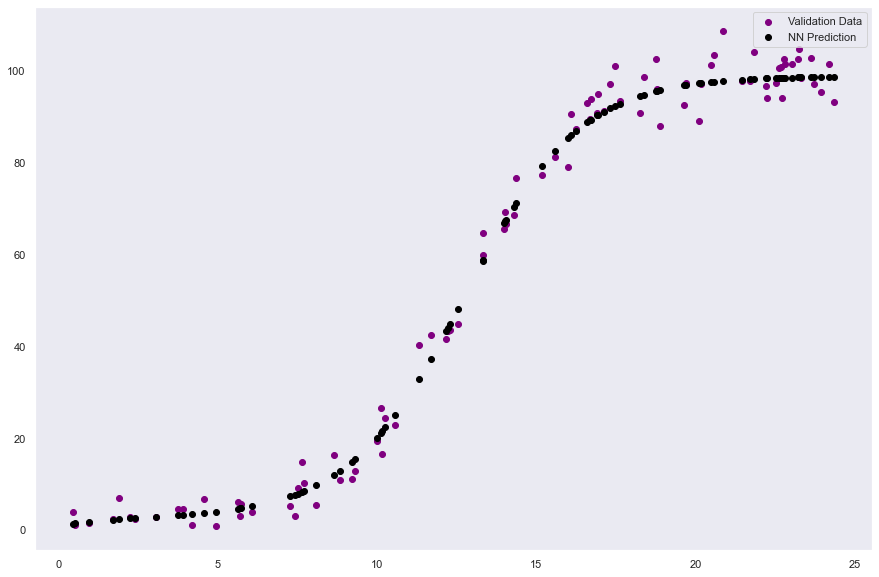

In [44]:
plt.figure(figsize=(15,10))

plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,model.predict(X_validation), color='black', label='NN Prediction')


plt.grid()
plt.legend()

As part of the project we were to deploy the model in production. The below can export the model to enable it to be used as part of the Flask application.

In [47]:
model.save("powerpred.h5")

# Conclusion
***

In conclusion we used three different machine learning models to determine the power output of a wind turbine with different wind speeds based on an existing dataset. 

Firstly as part of the project we evaluated the 500 data point dataset and removed all the zero outliers. The next exercise was to randomly split the data 80-20 to train and evaluate the model. Each model was trained and compared against the 20% validation data set. With the data set all values for power output were predicted. 

Each model provided varying levels of predictive accuracy.

The first model linear regression assumed a linear type relationship with the data.
The second model kNN used an average of the 5 nearest data points and used an average to predict the power output.
The final model used a keras neural network - two layer of tanh and linear activation to determine the power output with a given wind speed.

The below graph demonstrates the three models plotted alongside the Validation or objective data.

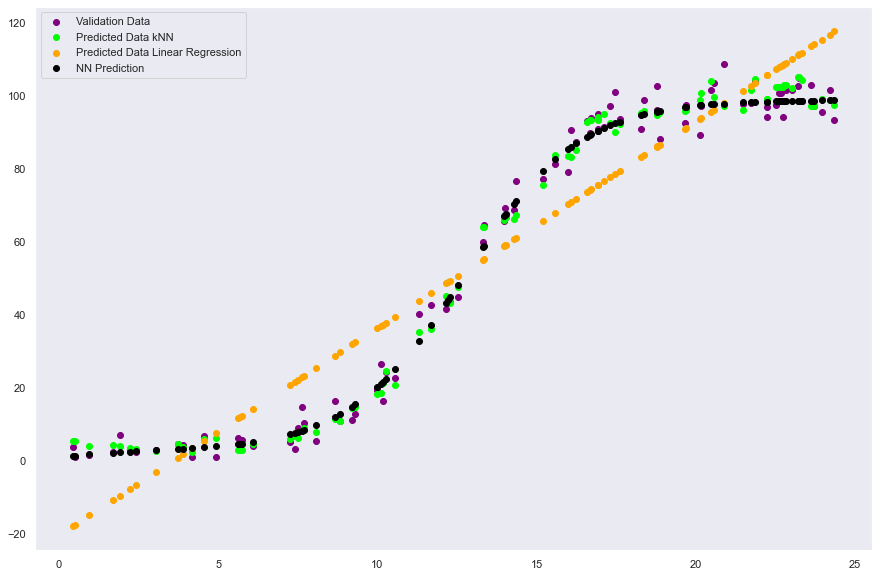

In [43]:
plt.figure(figsize=(15,10))

plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,Y_knn_pred,color='lime', label="Predicted Data kNN")
plt.scatter(X_validation,Y_pred,color='orange', label="Predicted Data Linear Regression")
plt.scatter(X_validation,model.predict(X_validation), color='black', label='NN Prediction')

plt.grid()
plt.legend()

# References
***

1. https://medium.com/@luwei.io/logistic-regression-with-keras-d75d640d175e
2. https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/
3. https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789132212/1/ch01lvl1sec15/logistic-regression-with-keras
4. https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
5. https://tomroth.com.au/keras/
6. https://curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/
7. https://towardsdatascience.com/deploying-keras-deep-learning-models-with-flask-5da4181436a2
8. https://medium.com/datadriveninvestor/flask-api-for-keras-87c06da174e8
9. https://www.duo.uio.no/bitstream/handle/10852/57735/Master_Thesis_Finn_Erik_20170525_FINAL.pdf?isAllowed=y&sequence=7
10. https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e
11. https://www.ibm.com/cloud/learn/neural-networks
12.